In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  

In [17]:
data = pd.read_csv('train-processed.csv', encoding='latin-1')
data.head(n=10)

,Sno.,labels,Bookreviews
0,1,1,this was the first clive cussler ive ever read...
1,2,1,i liked the da vinci code a lot
2,3,1,i liked the da vinci code a lot
3,4,1,i liked the da vinci code but it ultimatly did...
4,5,1,thats not even an exaggeration and at midnight...
5,6,1,i loved the da vinci code but now i want somet...
6,7,1,i thought da vinci code was great same with ki...
7,8,1,the da vinci code is actually a good movie
8,9,1,i thought the da vinci code was a pretty good ...
9,10,1,the da vinci code is one of the most beautiful...


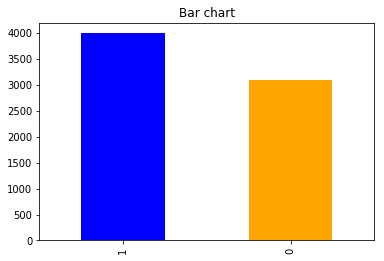

In [19]:
count_Class=pd.value_counts(data["labels"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

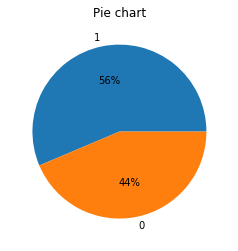

In [20]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [23]:
count1 = Counter(" ".join(data[data['labels']==1]["Bookreviews"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data['labels']==0]["Bookreviews"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

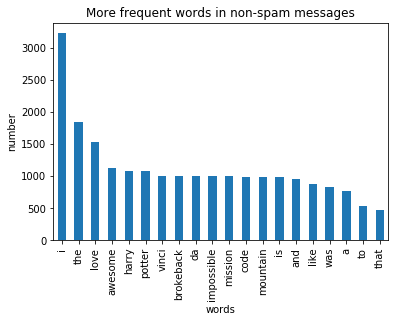

In [24]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

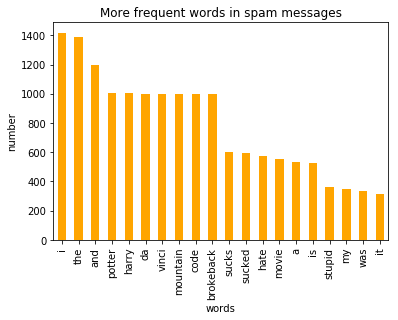

In [25]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [27]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = f.fit_transform(data["Bookreviews"])
np.shape(X)

(7085, 1943)

In [29]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['labels'], test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])


[(4746, 1943), (2339, 1943)]


In [11]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


In [30]:
model = Sequential()
model.add(Dense(850, input_dim=1943, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
model.fit(X_train, y_train, epochs=3, batch_size=10)

Epoch 1/3
4746/4746 [==============================] - 17s 4ms/step - loss: 4.3730e-04 - acc: 0.9996
Epoch 2/3
4746/4746 [==============================] - 16s 3ms/step - loss: 3.3717e-04 - acc: 0.9996
Epoch 3/3
4746/4746 [==============================] - 16s 3ms/step - loss: 3.1719e-04 - acc: 0.9998


In [35]:
for layer in model.layers:
    print(layer.get_weights())
    


[array([[-0.02941946, -0.01229598,  0.01292802, ..., -0.01114892,
        -0.03908753,  0.03772421],
       [-0.01183216, -0.05278742,  0.04835004, ..., -0.02380117,
        -0.04765435, -0.00814623],
       [ 0.05367716,  0.00697068, -0.02840145, ..., -0.00677197,
        -0.00903874,  0.01623227],
       ...,
       [-0.03311221, -0.0292332 ,  0.02579079, ...,  0.05158156,
         0.02702922, -0.00490587],
       [ 0.01456697, -0.03459439, -0.01956012, ..., -0.03233696,
        -0.00834278,  0.00587935],
       [-0.01063213,  0.05366204,  0.00318439, ...,  0.01067384,
        -0.0247317 , -0.00135755]], dtype=float32), array([ 3.27522606e-02,  1.18690301e-02,  2.83038486e-02,  2.69437898e-02,
        5.53855784e-02,  8.49675573e-03, -1.28403921e-02, -1.65601447e-02,
        8.08195770e-02,  3.81468236e-02,  3.31583968e-03,  1.32675376e-02,
        1.92900803e-02,  9.74548922e-04, -1.54915117e-02,  1.92601457e-02,
        1.47892116e-02,  3.31815034e-02,  2.40542013e-02,  2.30438933e